# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import pandas.util.testing as tm
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shutil, os
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
os.getcwd()

C:\Users\kurt_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


'C:\\Users\\kurt_\\Dropbox\\code\\ulku'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [31]:
path='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\data\\step3_output.csv'
df=pd.read_csv(path)
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X2 = df.drop(['Name', 'state', 'AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y2 = df.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2 = preprocessing.StandardScaler().fit(X2)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled2=scaler2.transform(X2) 
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y2 = y2.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.25, random_state=1)

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)
y_pred2 = lm2.predict(X_test2)
rmse2 = sqrt(mean_squared_error(y_test2, y_pred2))
exvarscore2 = explained_variance_score(y_test2, y_pred2)
mean_abs_err2= mean_absolute_error(y_test2, y_pred2)
print(f' RMSE = {rmse2}\n explained variance score = {exvarscore2}\n mean absolute error = {mean_abs_err2}  ')
print(f'intercept = {lm2.intercept_}')
pd.DataFrame(abs(lm2.coef_), X2.columns, columns=['Coefficient']).sort_values(
    by='Coefficient', ascending=False ).head(10)

 RMSE = 7.493018669088338
 explained variance score = 0.682068914680281
 mean absolute error = 6.034849208527497  
intercept = 56.364741715167206


,Coefficient
AdultWeekday,11.721148
summit_elev,2.830360
clusters,2.400571
daysOpenLastYear,1.657059
Runs,1.433916
projectedDaysOpen,1.407778
vertical_drop,1.302077
quad,1.265431
averageSnowfall,1.262688
double,1.114663


In [32]:
lm2.coef_

array([-2.83035985e+00,  1.30207656e+00,  8.88178420e-16,  2.66453526e-15,
        1.33226763e-15, -1.69351715e-01,  1.26543106e+00,  3.43284063e-01,
        1.11466286e+00, -8.53858528e-01,  5.94930549e-01,  1.43391601e+00,
        8.56492339e-01,  2.77531811e-01, -9.30034037e-01, -4.21278694e-01,
        1.65705894e+00, -4.37461306e-01, -1.26268842e+00,  1.17211485e+01,
       -1.40777757e+00,  7.29510188e-03,  2.40057103e+00])

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [3]:
#df[df['Name'].str.contains('Big Mountain')]
df[df['Name'].str.contains('Whitefish Mountain Resort')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
165,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [4]:
BigMountain = X_scaled2[165]

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [5]:
# Big_Mountain contains a single sample. So Wee need to reshape it. Otherwise it gives error
adultweekand = lm2.predict(BigMountain.reshape(1, -1))
adultweekand

array([82.11689501])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [6]:
df.loc[165,'AdultWeekend']

81.0

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

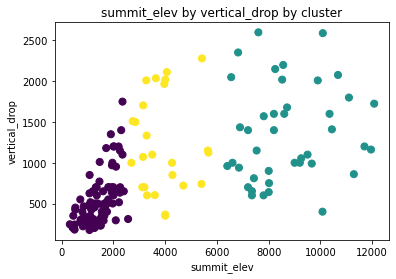

In [19]:
#plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
#plt.xlabel('summit_elev')
#plt.ylabel('vertical_drop')
#plt.title('summit_elev by vertical_drop by cluster')
#plt.savefig('figures/fig1.png',bbox_inches='tight')
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
path_='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\figures'
plt.savefig(path_+'\\fig1.png',bbox_inches='tight')

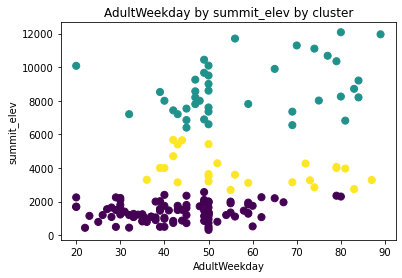

In [9]:
plt.scatter(df['AdultWeekday'], df['summit_elev'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('AdultWeekday')
plt.ylabel('summit_elev')
plt.title('AdultWeekday by summit_elev by cluster')
path_='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\figures'
plt.savefig(path_+'\\fig1.png',bbox_inches='tight')

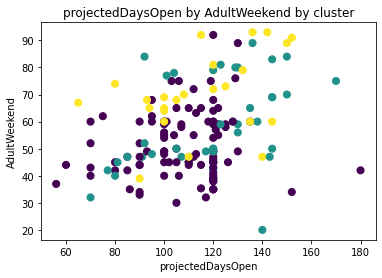

In [10]:
plt.scatter(df['projectedDaysOpen'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('projectedDaysOpen')
plt.ylabel('AdultWeekend')
plt.title('projectedDaysOpen by AdultWeekend by cluster')
path_='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\figures'
plt.savefig(path_+'\\fig2.png',bbox_inches='tight')

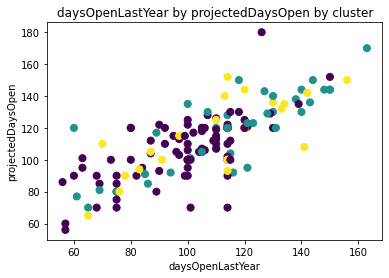

In [11]:
plt.scatter(df['daysOpenLastYear'], df['projectedDaysOpen'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('daysOpenLastYear')
plt.ylabel('projectedDaysOpen')
plt.title('daysOpenLastYear by projectedDaysOpen by cluster')
path_='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\figures'
plt.savefig(path_+'\\fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [12]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 
import pickle
s = pickle.dumps(model2)
from joblib import dump, load

path_d='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\models'
dump(model2, path_d + '/regression_model_adultweekend.joblib') 

['C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Notebook_steptwo.ipynb\\Step 2\\models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [29]:

print((f' RMSE = {rmse2}\n explained variance score = {exvarscore2}\n mean absolute error = {mean_abs_err2}'))

 RMSE = 7.493018669088338
 explained variance score = 0.682068914680281
 mean absolute error = 6.034849208527497


In [36]:
fd = pd.DataFrame(abs(lm2.coef_), X2.columns, columns=['Coefficient']).sort_values(
    by='Coefficient', ascending=False ).head(10)
fd=fd.T
fd['RMSE'] = rmse2
fd['explained_var_score'] = exvarscore2
fd['MAE'] = mean_abs_err2
fd

,AdultWeekday,summit_elev,clusters,daysOpenLastYear,Runs,projectedDaysOpen,vertical_drop,quad,averageSnowfall,double,RMSE,explained_var_score,MAE
Coefficient,11.721148,2.83036,2.400571,1.657059,1.433916,1.407778,1.302077,1.265431,1.262688,1.114663,7.493019,0.682069,6.034849
